## Imports

In [56]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn import tree
import numpy as np
from  matplotlib import pyplot 
import math
%matplotlib inline
import matplotlib.pyplot as plt

## The data

In [62]:
train = pd.read_csv('data/train.csv',index_col="Id" )

In [63]:
test = pd.read_csv('data/test.csv',index_col="Id" )

In [64]:
test['SalePrice'] = -1

In [65]:
len(test), len(train)

(1459, 1460)

In [6]:
df_raw = pd.concat([train, test])

In [66]:
df_raw_save = pd.concat([train, test])

In [7]:
len(df_raw)

2919

In [8]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [9]:
display_all(df_raw.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
pd.api.types.is_string_dtype(df_raw.Street)

True

## Initial processing

In [11]:
def train_cats(df):
    for n,c in df.items():
        if pd.api.types.is_string_dtype(c): df[n] = c.astype('category').cat.as_ordered()

In [12]:
train_cats(df_raw)

In [13]:
df_raw.Neighborhood.cat.categories

Index(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU',
       'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber', 'Veenker'],
      dtype='object')

In [14]:
display_all(df_raw.isnull().sum().sort_values(ascending=False))

PoolQC           2909
MiscFeature      2814
Alley            2721
Fence            2348
FireplaceQu      1420
LotFrontage       486
GarageFinish      159
GarageQual        159
GarageCond        159
GarageYrBlt       159
GarageType        157
BsmtCond           82
BsmtExposure       82
BsmtQual           81
BsmtFinType2       80
BsmtFinType1       79
MasVnrType         24
MasVnrArea         23
MSZoning            4
Functional          2
Utilities           2
BsmtHalfBath        2
BsmtFullBath        2
Exterior2nd         1
Exterior1st         1
BsmtUnfSF           1
TotalBsmtSF         1
GarageArea          1
KitchenQual         1
BsmtFinSF2          1
GarageCars          1
BsmtFinSF1          1
SaleType            1
Electrical          1
RoofStyle           0
RoofMatl            0
SalePrice           0
YearRemodAdd        0
YearBuilt           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
ExterQual           0
Neighborho

In [15]:
def cats_to_code(df):
    for n,c in df.items():
        if pd.api.types.is_categorical_dtype(c): df[n] = df[n].cat.codes

In [16]:
cats_to_code(df_raw)

In [17]:
def fix_missing(df):
    for name,col in df.items():
        if pd.api.types.is_numeric_dtype(col):
            if pd.isnull(col).sum():
                df[name+'_na'] = pd.isnull(col)
                filler = col.median()
                df[name] = col.fillna(filler)

In [18]:
fix_missing(df_raw)

In [19]:
display_all(df_raw.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_na,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,-1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,1,12,13,1,196.0,2,4,2,2,3,3,2,706.0,5,0.0,150.0,856.0,1,0,1,4,856,854,0,1710,1.0,0.0,2,1,3,1,2,8,6,0,-1,1,2003.0,1,2.0,548.0,4,4,2,0,61,0,0,0,0,-1,-1,-1,0,2,2008,8,4,208500,False,False,False,False,False,False,False,False,False,False,False
2,20,3,80.0,9600,1,-1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,1,8,8,2,0.0,3,4,1,2,3,1,0,978.0,5,0.0,284.0,1262.0,1,0,1,4,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,6,1,4,1,1976.0,1,2.0,460.0,4,4,2,298,0,0,0,0,0,-1,-1,-1,0,5,2007,8,4,181500,False,False,False,False,False,False,False,False,False,False,False
3,60,3,68.0,11250,1,-1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,1,12,13,1,162.0,2,4,2,2,3,2,2,486.0,5,0.0,434.0,920.0,1,0,1,4,920,866,0,1786,1.0,0.0,2,1,3,1,2,6,6,1,4,1,2001.0,1,2.0,608.0,4,4,2,0,42,0,0,0,0,-1,-1,-1,0,9,2008,8,4,223500,False,False,False,False,False,False,False,False,False,False,False
4,70,3,60.0,9550,1,-1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,1,13,15,2,0.0,3,4,0,3,1,3,0,216.0,5,0.0,540.0,756.0,1,2,1,4,961,756,0,1717,1.0,0.0,1,0,3,1,2,7,6,1,2,5,1998.0,2,3.0,642.0,4,4,2,0,35,272,0,0,0,-1,-1,-1,0,2,2006,8,0,140000,False,False,False,False,False,False,False,False,False,False,False
5,60,3,84.0,14260,1,-1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,1,12,13,1,350.0,2,4,2,2,3,0,2,655.0,5,0.0,490.0,1145.0,1,0,1,4,1145,1053,0,2198,1.0,0.0,2,1,4,1,2,9,6,1,4,1,2000.0,1,3.0,836.0,4,4,2,192,84,0,0,0,0,-1,-1,-1,0,12,2008,8,4,250000,False,False,False,False,False,False,False,False,False,False,False


## Split Train and Test

In [20]:
test = df_raw[df_raw.SalePrice == -1]
train = df_raw[df_raw.SalePrice > -1]

y = train.SalePrice
train = train.drop('SalePrice', axis=1)

In [37]:
test = test.drop('SalePrice', axis=1)

In [21]:
len(train)

1460

## Train

In [22]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(train, y)
m.score(train,y)

0.9690539428515642

## Base Model

In [23]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

In [24]:
n_valid = 292
n_trn = len(train)-n_valid  
raw_train, raw_valid = split_vals(train, n_trn)  
X_train, X_valid = split_vals(train, n_trn)  
y_train, y_valid = split_vals(y, n_trn)  

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((1168, 90), (1168,), (292, 90), (292,))

In [25]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [26]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 247 ms, sys: 7.16 ms, total: 254 ms
Wall time: 130 ms
[12498.614326834751, 38870.14889558127, 0.9748307502660887, 0.7746748377874906]


In [27]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[12399.170625221863, 34899.81397390907, 0.9752296690890611, 0.8183549748485038]


In [28]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds = np.stack([t.predict(X_valid) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_valid.iloc[0]

(array([165500., 214500., 117500., 257500., 211000., 160000., 240000.,
        200500., 135000., 211000.]), 191250.0, 235000)

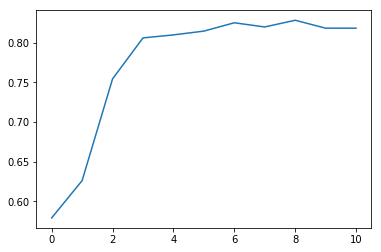

In [29]:
pyplot.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(11)]);

The shape of this curve suggests that adding more trees isn't going to help us much. Let's check.

In [30]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[12404.174021208275, 35468.78007891695, 0.975209674077507, 0.8123840369689823]


In [31]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[11776.615197540337, 35202.49682369162, 0.9776546323263271, 0.8151905307205565]


In [32]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[11267.664353123786, 35271.8156618516, 0.979544300331774, 0.8144619806464949]


In [33]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[12409.223356037786, 37010.23930644519, 0.975189487302771, 0.7957222478054266, 0.8527193283113201]


## Parameters

In [34]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features='sqrt', n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[20051.416848512235, 36259.02736309339, 0.9352206379228416, 0.8039307064183224, 0.8434171780699291]


In [35]:
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[18728.540621883778, 38224.701291305195, 0.9434862130187422, 0.7820958585372568, 0.7731432029574048]


## submit

In [44]:
submit = pd.DataFrame()
submit['Id'] = test.index

In [45]:
predictions = m.predict(test)
submit['SalePrice'] = predictions
submit['SalePrice'] = submit['SalePrice'].astype(int)
submit.to_csv('firstRF.csv', index=False, header=True)

In [46]:
submit.head()

,Id,SalePrice
0,1461,121854
1,1462,151081
2,1463,176442
3,1464,184653
4,1465,204246


## Plot

In [54]:
preds = m.predict(X_valid)

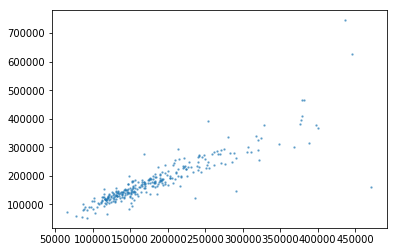

In [58]:
plt.scatter(preds, y_valid, alpha=0.5, s=2);

In [67]:
display_all(df_raw_save.head())

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


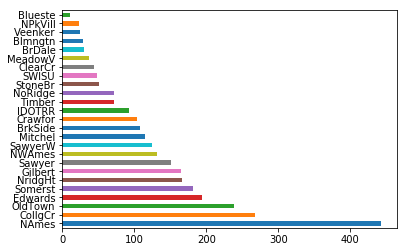

In [69]:
x = df_raw_save.copy()
x['pred_std'] = np.std(preds, axis=0)
x['pred'] = np.mean(preds, axis=0)
x.Neighborhood.value_counts().plot.barh();

In [74]:
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


[18574.71960214542, 33696.01801456198, 0.9444107174809808, 0.8306697898797912, 0.7377553504330634]


In [83]:
feature_importances = pd.DataFrame(data= { 'feature_importance_values':
                                          m.feature_importances_}, index=X_train.columns.values)
feature_importances.sort_values('feature_importance_values')

,feature_importance_values
LowQualFinSF,0.000000
Heating,0.000000
GarageCars_na,0.000000
3SsnPorch,0.000000
PoolArea,0.000000
PoolQC,0.000000
MiscFeature,0.000000
Foundation,0.000000
MiscVal,0.000000
BsmtFinSF1_na,0.000000


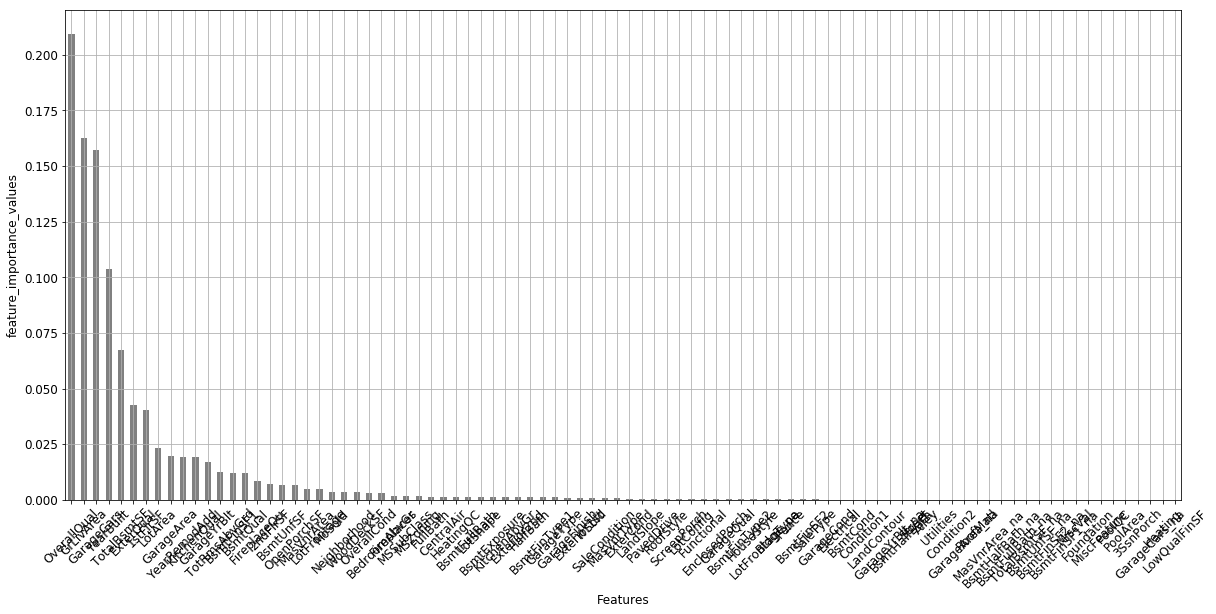

In [86]:
plt.rcParams['font.size'] = 12
plot = feature_importances.feature_importance_values.sort_values(ascending=False).plot(capsize=5, legend=False, grid=True,color ='grey', kind='bar', figsize= (20,9))

for label in plot.get_xticklabels():
    label.set_rotation(45)

plot.set_ylabel('feature_importance_values')
plot.set_xlabel('Features')

plt.show()

## One-hot encoding

TODO

## Removing redundant features

In [90]:
from scipy.cluster import hierarchy as hc
import scipy

corr = np.round(scipy.stats.spearmanr(X_train).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [96]:
corrMatrixDataNum = X_train.corr(method='kendall')
corrMatrixDataNum

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MasVnrArea_na,BsmtFinSF1_na,BsmtFinSF2_na,BsmtUnfSF_na,TotalBsmtSF_na,BsmtFullBath_na,BsmtHalfBath_na,GarageYrBlt_na,GarageCars_na,GarageArea_na
MSSubClass,1.000000,0.103137,-0.219278,-0.205979,-0.032118,0.131824,0.079152,-0.006287,-0.029115,0.039974,...,-0.010888,NaN,NaN,NaN,NaN,NaN,NaN,0.059347,NaN,NaN
MSZoning,0.103137,1.000000,-0.201181,-0.169522,0.040587,0.054312,0.151270,0.012606,-0.005897,0.024626,...,-0.087439,NaN,NaN,NaN,NaN,NaN,NaN,0.078769,NaN,NaN
LotFrontage,-0.219278,-0.201181,1.000000,0.429862,-0.042202,-0.183557,-0.088714,0.023482,-0.001715,-0.106123,...,-0.012021,NaN,NaN,NaN,NaN,NaN,NaN,-0.122033,NaN,NaN
LotArea,-0.205979,-0.169522,0.429862,1.000000,-0.036131,-0.121995,-0.234574,-0.057984,0.033744,-0.157686,...,-0.000348,NaN,NaN,NaN,NaN,NaN,NaN,-0.124732,NaN,NaN
Street,-0.032118,0.040587,-0.042202,-0.036131,1.000000,0.016426,-0.003764,0.153106,0.001919,0.022174,...,0.004712,NaN,NaN,NaN,NaN,NaN,NaN,-0.041287,NaN,NaN
Alley,0.131824,0.054312,-0.183557,-0.121995,0.016426,1.000000,0.104333,-0.053677,-0.007333,0.056622,...,0.033689,NaN,NaN,NaN,NaN,NaN,NaN,0.046406,NaN,NaN
LotShape,0.079152,0.151270,-0.088714,-0.234574,-0.003764,0.104333,1.000000,0.097500,-0.039374,0.205363,...,0.003561,NaN,NaN,NaN,NaN,NaN,NaN,0.071930,NaN,NaN
LandContour,-0.006287,0.012606,0.023482,-0.057984,0.153106,-0.053677,0.097500,1.000000,0.009505,-0.021160,...,0.023333,NaN,NaN,NaN,NaN,NaN,NaN,-0.021417,NaN,NaN
Utilities,-0.029115,-0.005897,-0.001715,0.033744,0.001919,-0.007333,-0.039374,0.009505,1.000000,-0.035470,...,-0.002103,NaN,NaN,NaN,NaN,NaN,NaN,-0.007106,NaN,NaN
LotConfig,0.039974,0.024626,-0.106123,-0.157686,0.022174,0.056622,0.205363,-0.021160,-0.035470,1.000000,...,-0.006852,NaN,NaN,NaN,NaN,NaN,NaN,0.055821,NaN,NaN


## Partial Dependence

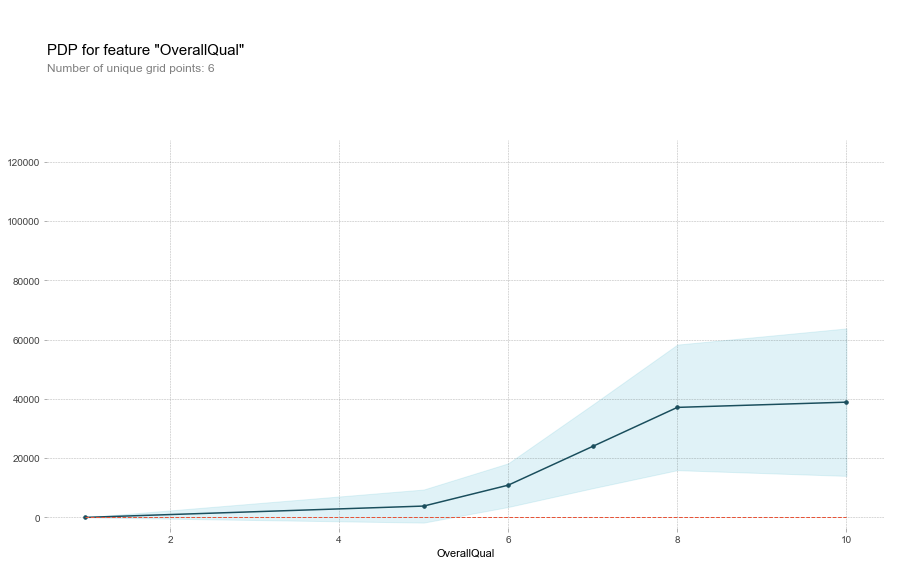

In [99]:
from pdpbox import pdp, get_dataset, info_plots

# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=m, dataset=X_train, model_features=X_train.columns, feature='OverallQual')

# plot it
pdp.pdp_plot(pdp_goals, 'OverallQual')
plt.show()

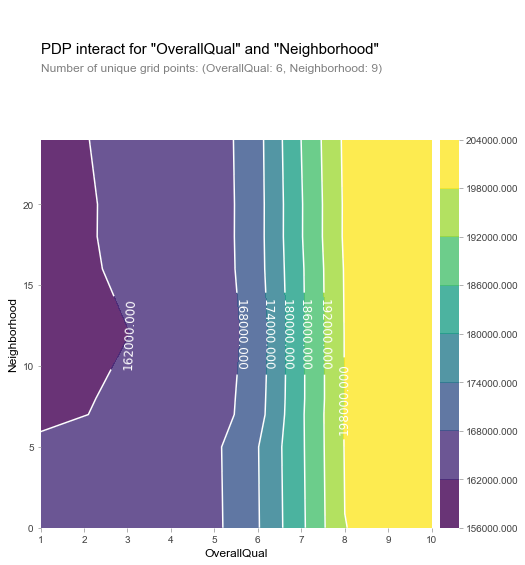

In [101]:
features_to_plot = ['OverallQual', 'Neighborhood']
inter1  =  pdp.pdp_interact(model=m, dataset=X_train, model_features=X_train.columns, features=features_to_plot)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=features_to_plot, plot_type='contour')
plt.show()